In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from load_wastewater_data import load_systems_data

# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [2]:
# define experiment to be preprocessed
experiment_series = "2024_09_17"

resolution = "3_min_resolution" 
degradation_setting = "no_decay" # one of "no_decay", "linear_decay_dynamics", "constant_decay_dynamics"

In [3]:
plot_path = f"../plots/wastewater_model/rain_scenarios"
os.makedirs(os.path.join(plot_path), exist_ok=True)
file_name = f"flow_rates_{resolution}_{degradation_setting}"

Load data

In [4]:
rain_scenarios = ["KeinRegen", "Nieselregen", "MittelstarkerRegen"]

# Load data
df_1 = load_systems_data(experiment_series, resolution, rain_scenarios[0], degradation_setting, file_type="flow_rates")
df_2 = load_systems_data(experiment_series, resolution, rain_scenarios[1], degradation_setting, file_type="flow_rates")
df_3 = load_systems_data(experiment_series, resolution, rain_scenarios[2], degradation_setting, file_type="flow_rates")

# delete extreme values at the beginning and end
#df_1 = df_1.loc[df_1["l/s"]<0.179,:]
#df_1 = df_1.loc[df_1["l/s"]>0.163,:]

df_1["rain_scenario"] = rain_scenarios[0]
df_2["rain_scenario"] = rain_scenarios[1]
df_3["rain_scenario"] = rain_scenarios[2]
df_rain = pd.concat([df_1, df_2, df_3])

In [5]:
del df_1, df_2, df_3

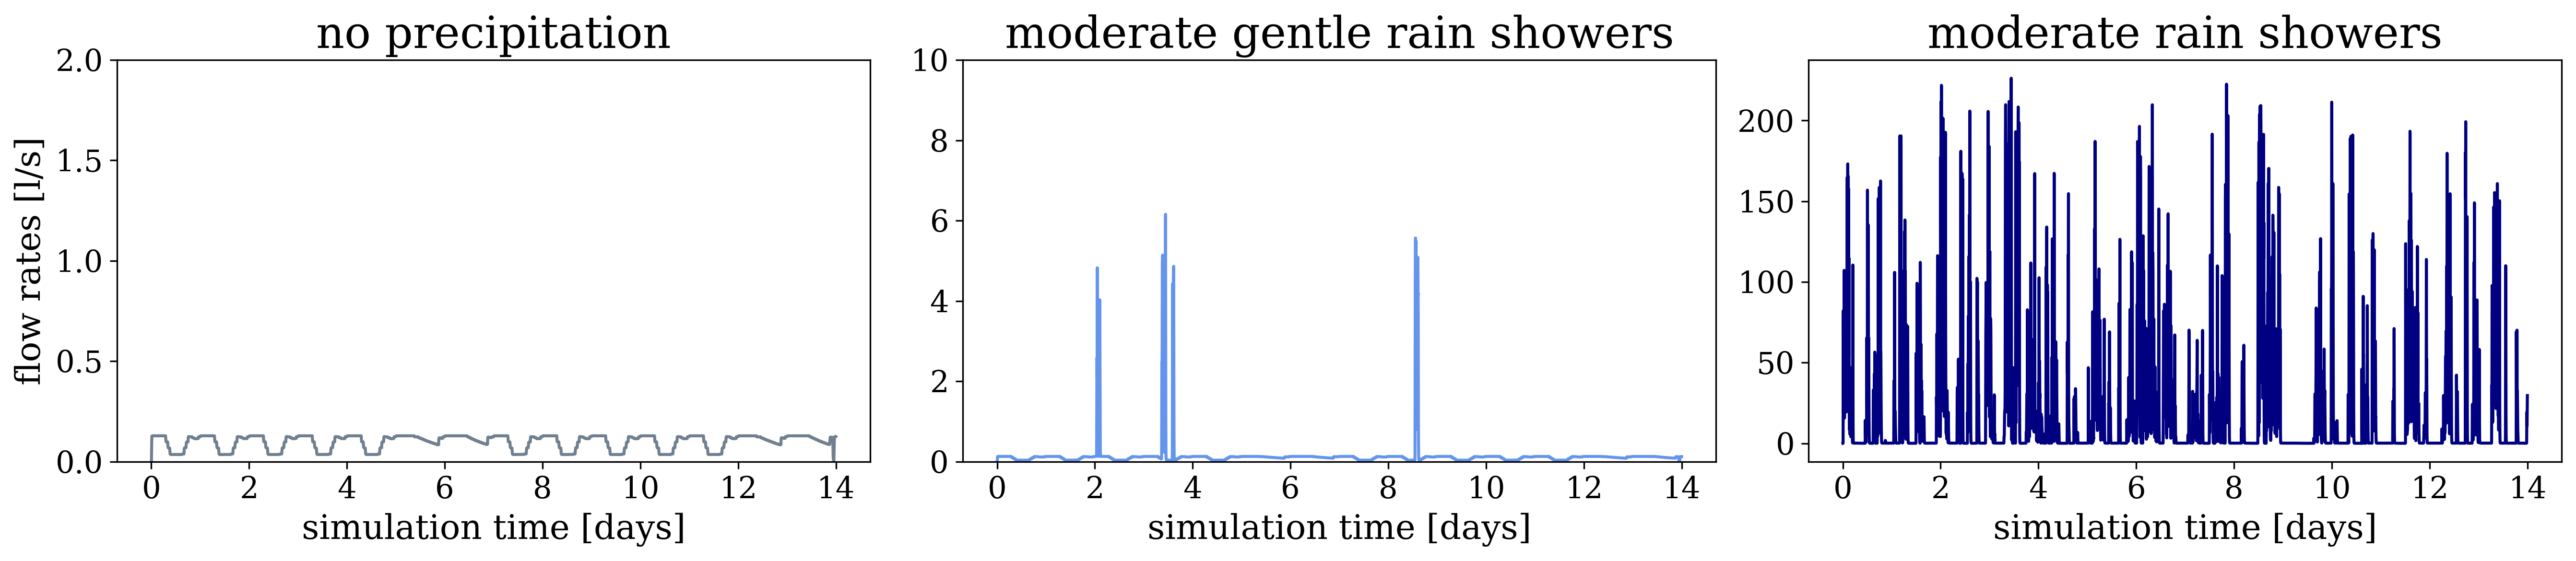

In [6]:
station = "1"
df_station = df_rain.loc[df_rain.sampling_point==station,:].copy()
fig, axs = plt.subplots(ncols=3, sharey=False, figsize=(18, 4), dpi=300)
for i, (variate, variate_title) in enumerate(zip(rain_scenarios, ["no precipitation", "moderate gentle rain showers", "moderate rain showers"])):
    df_plot = df_station.loc[df_station.rain_scenario==variate,:].groupby("time_in_days")["l/s"].mean().reset_index()
    sns.lineplot(data=df_plot, x="time_in_days", y="l/s", ax=axs[i], color=["slategray", "cornflowerblue", "navy"][i])
    axs[i].set_title(f"{variate_title}", fontsize=22)
    axs[i].set_xlabel(f"simulation time [days]", fontsize=17)
    if i==0:
        axs[i].set_ylabel(f"flow rates [l/s]", fontsize=17)
    else:
        axs[i].set_ylabel("")
    axs[i].tick_params(axis='x', labelsize=15)
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_ylim(0.0, 2.0)
axs[1].set_ylim(0.0, 10)
#axs[2].set_ylim(0.16, 0.179)
axs[0].set_xticks(np.arange(0, 15, 2))

plt.tight_layout()
fig.savefig(os.path.join(plot_path, file_name + f"_station_{station}.png"))



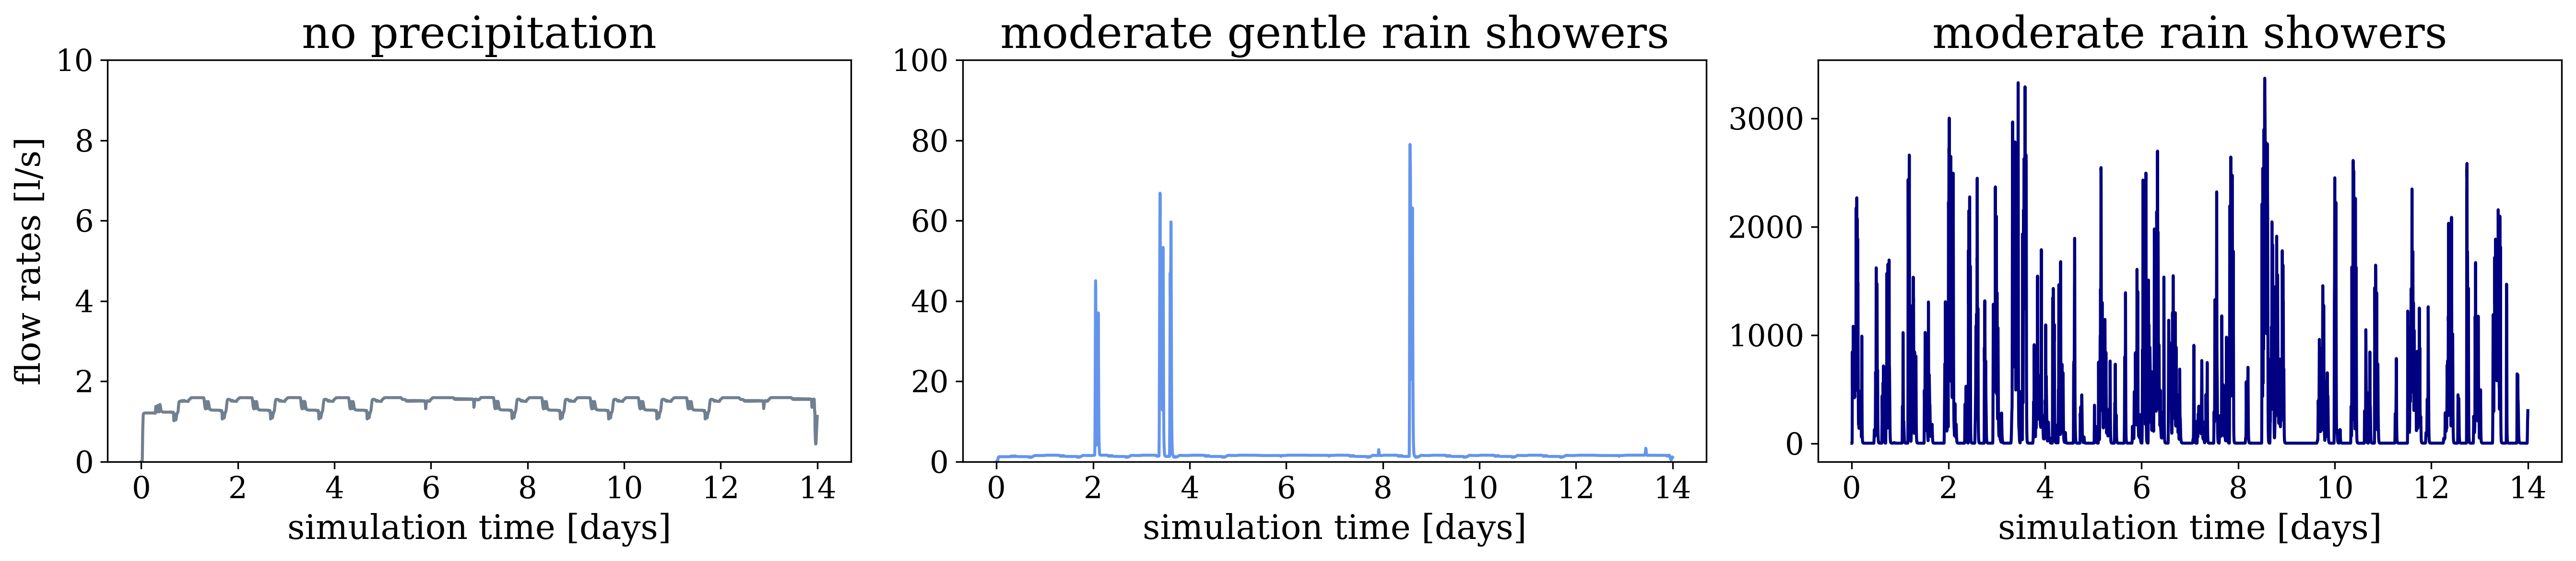

In [7]:
station = "16"
df_station = df_rain.loc[df_rain.sampling_point==station,:].copy()
fig, axs = plt.subplots(ncols=3, sharey=False, figsize=(18, 4), dpi=300)
for i, (variate, variate_title) in enumerate(zip(rain_scenarios, ["no precipitation", "moderate gentle rain showers", "moderate rain showers"])):
    df_plot = df_station.loc[df_station.rain_scenario==variate,:].groupby("time_in_days")["l/s"].mean().reset_index()
    sns.lineplot(data=df_plot, x="time_in_days", y="l/s", ax=axs[i], color=["slategray", "cornflowerblue", "navy"][i])
    axs[i].set_title(f"{variate_title}", fontsize=22)
    axs[i].set_xlabel(f"simulation time [days]", fontsize=17)
    if i==0:
        axs[i].set_ylabel(f"flow rates [l/s]", fontsize=17)
    else:
        axs[i].set_ylabel("")
    axs[i].tick_params(axis='x', labelsize=15)
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_ylim(0.0, 10.0)
axs[1].set_ylim(0.0, 100)
#axs[2].set_ylim(0.16, 0.179)
axs[0].set_xticks(np.arange(0, 15, 2))

plt.tight_layout()
fig.savefig(os.path.join(plot_path, file_name + f"_station_{station}.png"))



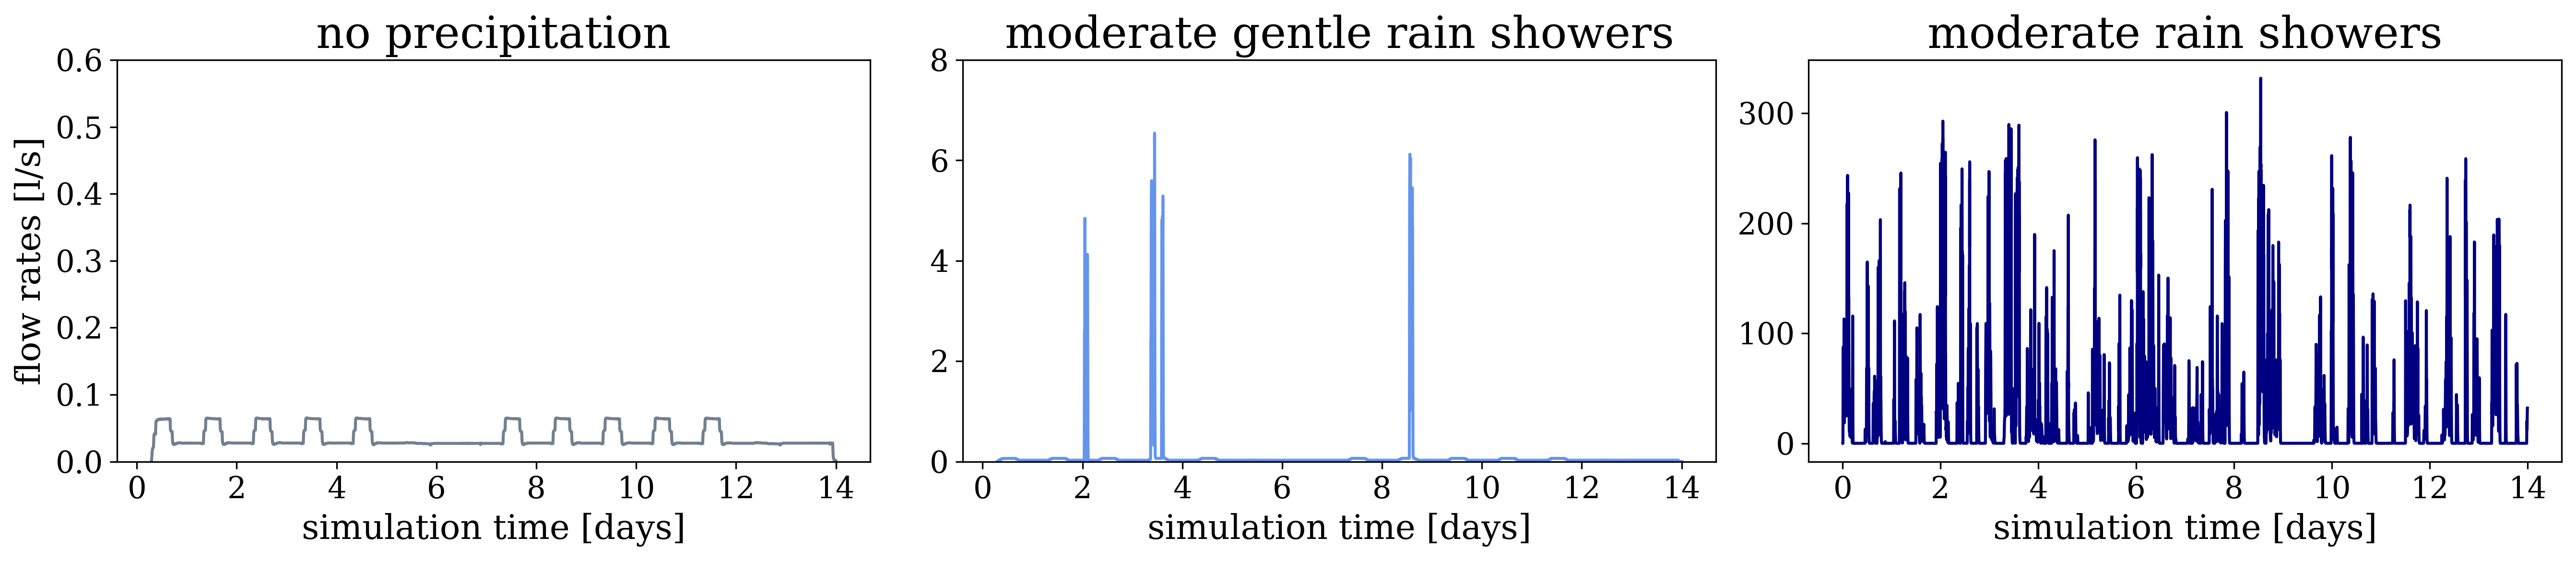

In [10]:
station = "11"
df_station = df_rain.loc[df_rain.sampling_point==station,:].copy()
fig, axs = plt.subplots(ncols=3, sharey=False, figsize=(18, 4), dpi=300)
for i, (variate, variate_title) in enumerate(zip(rain_scenarios, ["no precipitation", "moderate gentle rain showers", "moderate rain showers"])):
    df_plot = df_station.loc[df_station.rain_scenario==variate,:].groupby("time_in_days")["l/s"].mean().reset_index()
    sns.lineplot(data=df_plot, x="time_in_days", y="l/s", ax=axs[i], color=["slategray", "cornflowerblue", "navy"][i])
    axs[i].set_title(f"{variate_title}", fontsize=22)
    axs[i].set_xlabel(f"simulation time [days]", fontsize=17)
    if i==0:
        axs[i].set_ylabel(f"flow rates [l/s]", fontsize=17)
    else:
        axs[i].set_ylabel("")
    axs[i].tick_params(axis='x', labelsize=15)
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_ylim(0.0, 0.6)
axs[1].set_ylim(0.0, 8)
#axs[2].set_ylim(0.16, 0.179)
axs[0].set_xticks(np.arange(0, 15, 2))

plt.tight_layout()
fig.savefig(os.path.join(plot_path, file_name + f"_station_{station}.png"))

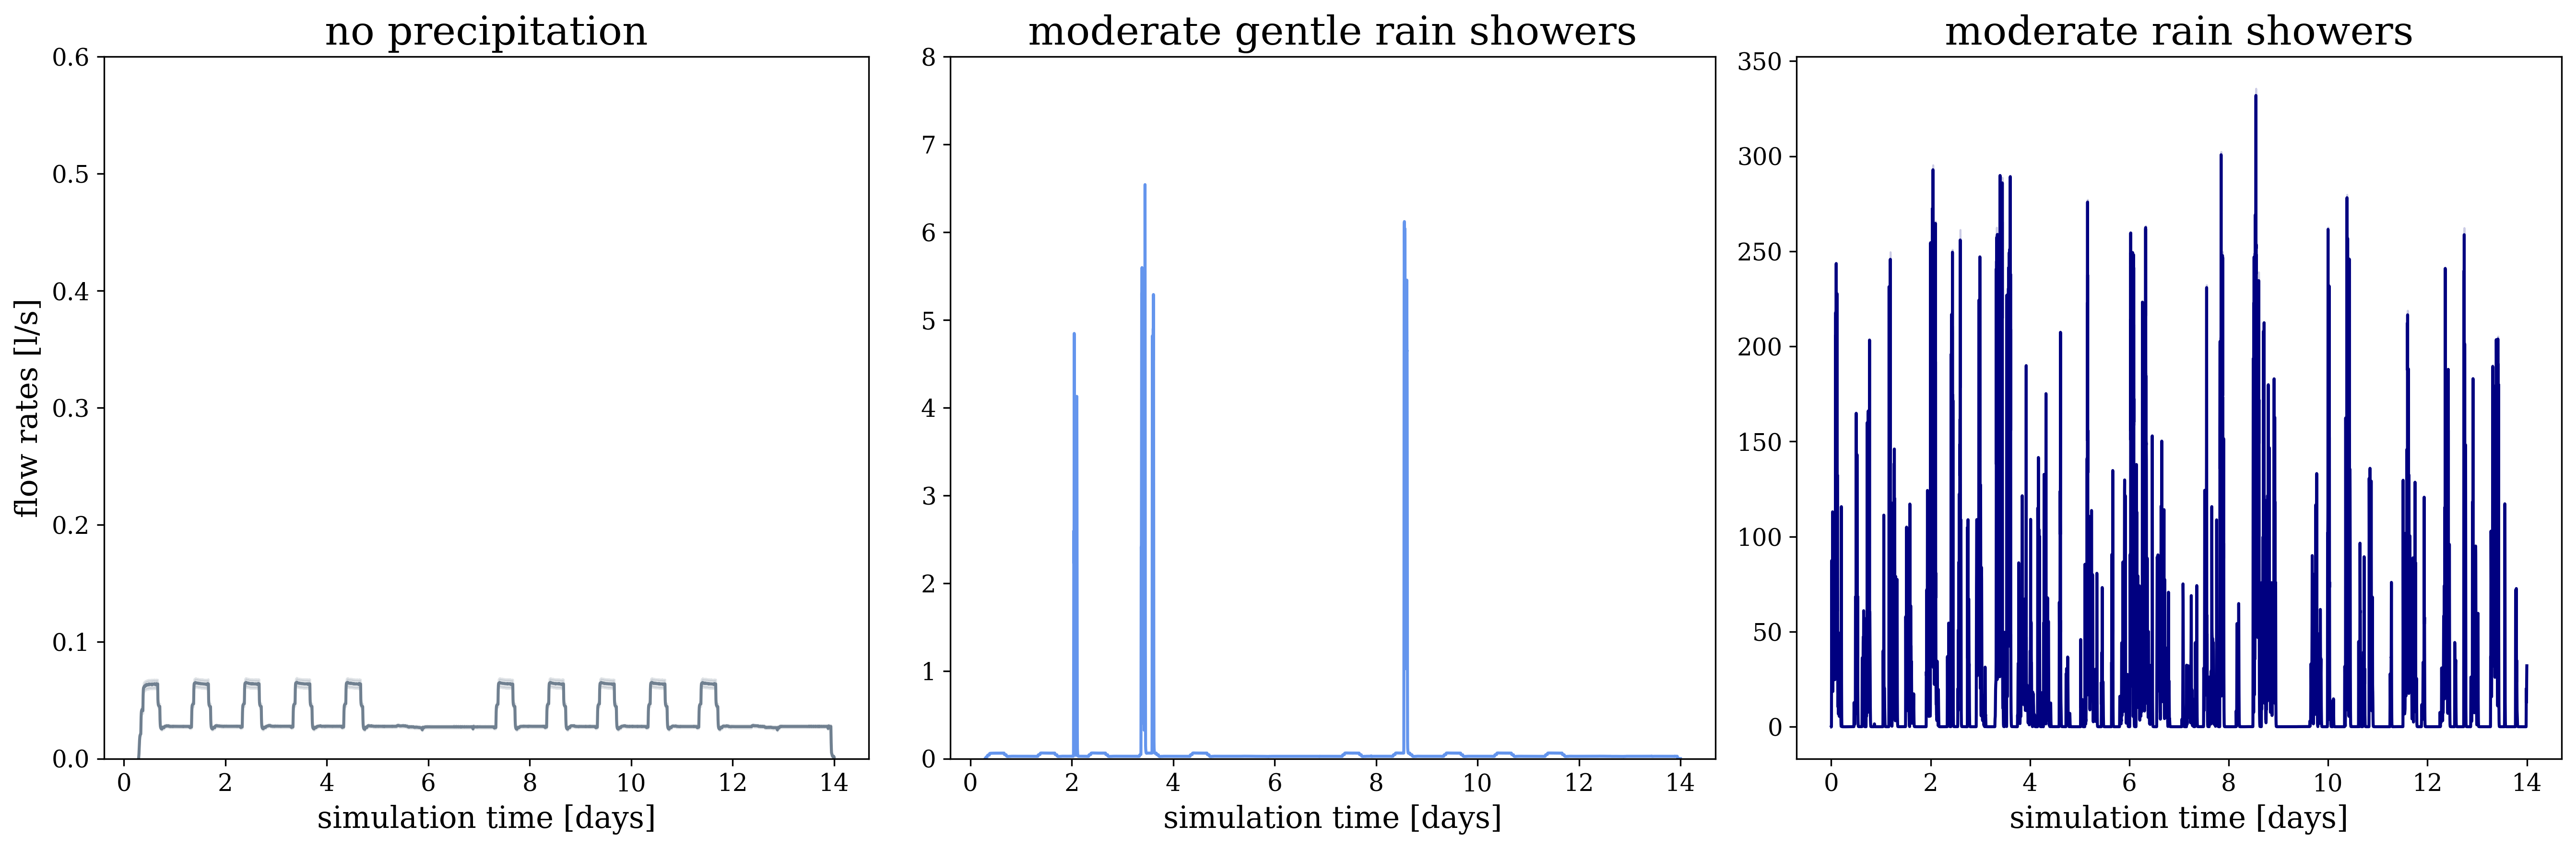

: 

In [42]:
def rain_scenarios_next_to_each_other(station):
    df_station = df_rain.loc[df_rain.sampling_point==station,:].sort_values("time_in_days")

    fig, axs = plt.subplots(ncols=3, sharey=False, figsize=(18, 6), dpi=300)
    for i, (variate, variate_title) in enumerate(zip(rain_scenarios, ["no precipitation", "moderate gentle rain showers", "moderate rain showers"])):
        sns.lineplot(data=df_station.loc[df_station.rain_scenario==variate,:], x="time_in_days", y="l/s", ax=axs[i], color=["slategray", "cornflowerblue", "navy"][i])
        axs[i].set_title(f"{variate_title}", fontsize=20)    
        axs[i].set_xlabel(f"simulation time [days]", fontsize=15)
        if i==0:
            axs[i].set_ylabel(f"flow rates [l/s]", fontsize=15)
        else:
            axs[i].set_ylabel("")
        axs[i].tick_params(axis='x', labelsize=12)
        axs[i].tick_params(axis='y', labelsize=12)

    axs[0].set_ylim(0.0, 0.6)
    axs[1].set_ylim(0.0, 8)
    #axs[2].set_ylim(0.16, 0.179)
    axs[0].set_xticks(np.arange(0, 15, 2))
    
    plt.tight_layout()
    fig.savefig(os.path.join(plot_path, file_name + f"_station_{station}.png"))
    # plt.close(fig)

for station in ["11"]: #, "16"
    rain_scenarios_next_to_each_other(station)